In [291]:
# in case variables need to be cleared, use
# %reset

In [292]:
# setup for first running, using bash
# requires installation of the following (bash commands given)
# pip3 install jupyter
# pip3 install ipykernel
# pip3 install ipython
# conda deactivate #in case a conda environment is running
# to activate the virtual environ, run while in the same directory:
# source ./notebookenv/nbvenv_py3115/bin/activate   
# the next commands put the kernel location in this notebook
# ipython kernel install --user --name=nbvenv_py3115  
# python3 -m ipykernel install --user --name=nbvenv_py3115

In [293]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

In [294]:
#stats from lower 48 CP fact sheets for 2018-2022
USA48 = pd.read_csv('data/lower48Output.csv')
#stats from CP sustainability reports for total USA processes 2018-2022
GHG_CP = pd.read_csv('data/GHG_transpose.csv');

In [295]:
USA48_r = USA48.drop(list(range(43,51))) #remove note rows.
USA48_r

,Unnamed: 0,2018,2019,2020,2021,2022
0,Eagle Ford,NaN,NaN,NaN,NaN,NaN
1,Crude Oil (MBD),109.000,125.000,103.000,116.000,117.000
2,Crude Oil (MMBY),39.785,45.625,37.595,42.340,42.705
3,Nat Gas (MMCFD),212.000,251.000,228.000,251.000,271.000
4,Nat Gas (MMMCFY),77.480,91.615,83.220,91.615,98.915
5,NGL (MBD),42.000,49.000,46.000,53.000,58.000
6,NGL (MMBY),15.330,17.885,16.790,19.345,21.170
7,Total MBOED,186.000,216.000,186.000,211.000,220.000
8,Total (MMBOEY),67.890,78.840,67.890,77.015,80.300
9,Bakken,NaN,NaN,NaN,NaN,NaN


In [296]:
U = USA48_r.to_numpy(copy=True) #convert to numpy as a copy

In [297]:
#conveniently, we have 3 areas of interest and 3 unknowns, making it possible for us to get an appx of the oil equiv for each substance per unit volume for each year. This way we can see if there is any noticeable difference from year to year
years = 5
types = 3
#So, we solve for MMBOEY (millions barrels of oil equivalent) of the three production types in our areas of interest

#crude, ng, ngl yearly outputs are the respective values of the columns, with each row representing an area of interest (AOI)

equivs = np.zeros(shape=(years,types))
#create variable size array since better for numpy performance than appending
for i in range(1,6):
    producedMatrix = np.array([
                [U[2][i],U[4][i],U[6][i]],
                [U[11][i],U[13][i],U[15][i]],
                [U[22][i],U[26][i],U[30][i]]
                ])
    MMBOEY = np.array(
                [U[8][i],U[17][i],U[34][i]])
    equivs[i-1] = np.linalg.solve(producedMatrix,MMBOEY)

In [298]:
equivalents_pd = pd.DataFrame(equivs, columns=['Crude Oil (MMB)','Natural Gas (MMMCF)', 'Natural Gas Liquids (MMB)'])
equivalents_pd.index = columns=USA48.columns[1:]

,Crude Oil (MMB),Natural Gas (MMMCF),Natural Gas Liquids (MMB)
count,5.000000,5.000000,5.000000
mean,0.983502,0.170926,1.010062
std,0.018587,0.010198,0.028340
min,0.960487,0.152838,0.972222
25%,0.974983,0.173853,0.998707
50%,0.985344,0.174506,1.003839
75%,0.985399,0.176303,1.031551
max,1.011297,0.177129,1.043992


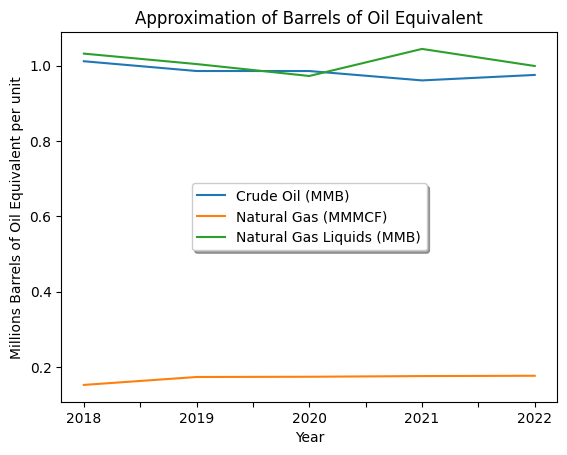

In [299]:
equivPlot = equivalents_pd.plot()
equivPlot.set_ylabel("Millions Barrels of Oil Equivalent per unit")
equivPlot.set_xlabel("Year")
equivPlot.legend(loc="center",shadow=True);
equivPlot.set_title("Approximation of Barrels of Oil Equivalent");
equivalents_pd.describe()

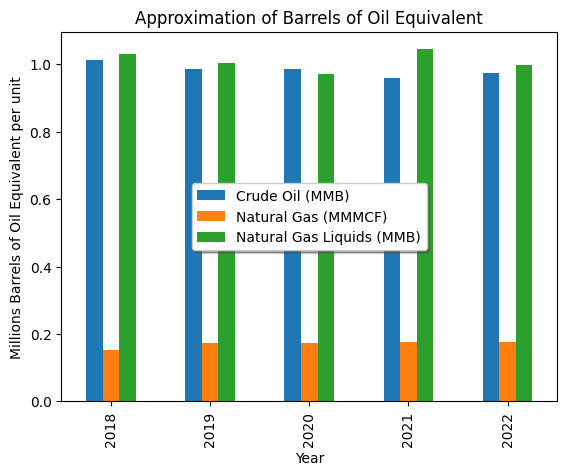

In [300]:
barPlot = equivalents_pd.plot.bar()
barPlot.set_ylabel("Millions Barrels of Oil Equivalent per unit")
barPlot.set_xlabel("Year")
barPlot.legend(loc="center",shadow=True);
barPlot.set_title("Approximation of Barrels of Oil Equivalent");


In [301]:
GHG_CP

,Year,CLIMATE AND AIR EMISSIONS,Unnamed: 2,GHGs (thousand tonnes),CO2 from Operations,CO2 from Imported Electricity,Methane (CO2 equivalent),Nitrous Oxide (CO2 equivalent),Total Greenhouse Gases,Unnamed: 9,...,Water,Fresh Water Withdrawn (million cubic meters),Non-Fresh Water Withdrawn (million cubic meters) 5,Produced Water Recycle/Reuse (million cubic meters) 6,Hydrocarbons in Overboard Discharges (tonnes),Unnamed: 30,Unnamed: 31,PRODUCTION,Unnamed: 33,Total Operated Production (MMBOEY)
0,2018,NaN,NaN,NaN,5000,600,1400,0,7000,NaN,...,NaN,"13,000","15,100","56,700",0,NaN,NaN,NaN,NaN,240
1,2019,NaN,NaN,NaN,5900,600,1600,0,8100,NaN,...,NaN,8.3,20.6,60.8,0,NaN,NaN,NaN,NaN,261
2,2020,NaN,NaN,NaN,4600,400,1500,0,6500,NaN,...,NaN,5.7,17.3,44.4,0,NaN,NaN,NaN,NaN,219
3,2021,NaN,NaN,NaN,6200,600,1600,10,8410,NaN,...,NaN,5.8,25.5,54.6,0,NaN,NaN,NaN,NaN,412
4,2022,NaN,NaN,NaN,6129,711,1593,8,8441,NaN,...,NaN,5.4,26.7,49.6,0,NaN,NaN,NaN,NaN,445


In [302]:
# use transpose of lower 48 data for this data frame
US48T = pd.read_csv('data/USA_T.csv')
# Splice datasets to graph using parts of GHG and the lower48 data

productionData = pd.concat([US48T['Aoi (MMBOEY)'],GHG_CP['Total Operated Production (MMBOEY)'],GHG_CP['  CO2 from Operations']], axis=1)
productionData=productionData.rename(index=GHG_CP['Year'])
productionData=productionData.rename(columns={'Aoi (MMBOEY)':"Total Production from Areas of Interest", 'Total Operated Production (MMBOEY)':"Total USA Operated Production (MMBOE)",
       '  CO2 from Operations':"CO2 from USA Operations (thousand tonnes)"})
productionData

,Total Production from Areas of Interest,Total USA Operated Production (MMBOE),CO2 from USA Operations (thousand tonnes)
2018,122.640,240,5000
2019,170.090,261,5900
2020,127.385,219,4600
2021,265.355,412,6200
2022,353.320,445,6129


In [303]:
productionShare = pd.DataFrame(US48T,columns=['Aoi (MMBOEY)','Crude Oil (%)','Nat Gas (%)','NGL (%)'])
productionShare = productionShare.rename(index=GHG_CP['Year'])
productionShare = productionShare.rename(columns={'Aoi (MMBOEY)':"Total Production from Areas of Interest",'Crude Oil (%)':"Crude Oil (%)",'Nat Gas (%)':"Natural Gas (%)",'NGL (%)':"Natural Gas Liquids (%)"})
productionShare

,Total Production from Areas of Interest,Crude Oil (%),Natural Gas (%),Natural Gas Liquids (%)
2018,122.640,0.58,0.25,0.17
2019,170.090,0.59,0.23,0.18
2020,127.385,0.55,0.25,0.20
2021,265.355,0.57,0.29,0.14
2022,353.320,0.54,0.24,0.22


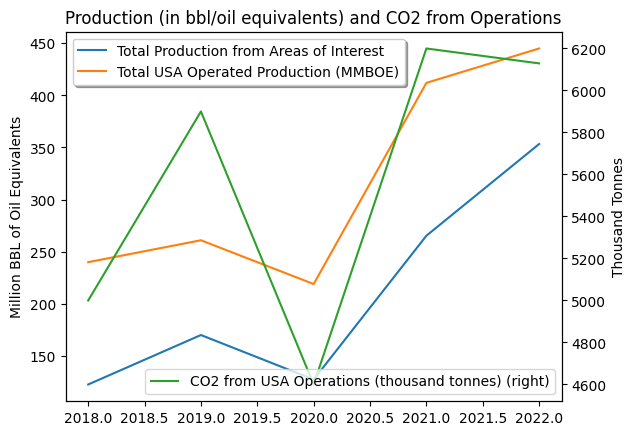

In [304]:
prodPlot = productionData["Total Production from Areas of Interest"].plot()
productionData["Total USA Operated Production (MMBOE)"].plot()
prodPlot.set_ylabel("Million BBL of Oil Equivalents")

ax = productionData['CO2 from USA Operations (thousand tonnes)'].plot(secondary_y=True)
ax.legend(loc=4)
ax.set_ylabel("Thousand Tonnes")
# prodPlot.set_xlabel("Year")
prodPlot.legend(loc="best",shadow=True);
prodPlot.set_title("Production (in bbl/oil equivalents) and CO2 from Operations");


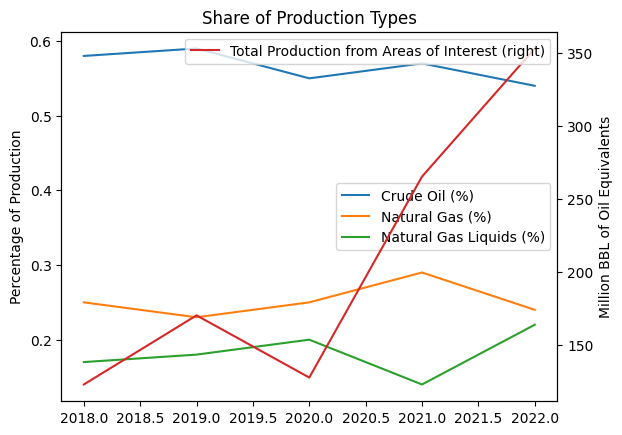

In [305]:
sharePlot = productionShare["Crude Oil (%)"].plot()
productionShare["Natural Gas (%)"].plot()
productionShare["Natural Gas Liquids (%)"].plot()
sharePlot.set_ylabel("Percentage of Production")
sharePlot.legend(loc=6)
ax = productionShare["Total Production from Areas of Interest"].plot(secondary_y=True)
# productionData["Total USA Operated Production (MMBOE)"].plot()
ax.set_ylabel("Million BBL of Oil Equivalents")
# Millions of Barrels of Oil Equivalent

# ax = productionData['CO2 from USA Operations (thousand tonnes)'].plot(secondary_y=True)
ax.legend(loc=1)
# ax.set_ylabel("Thousand Tonnes")
# prodPlot.set_xlabel("Year")
# prodPlot.legend(loc="best",shadow=True);
sharePlot.set_title("Share of Production Types");